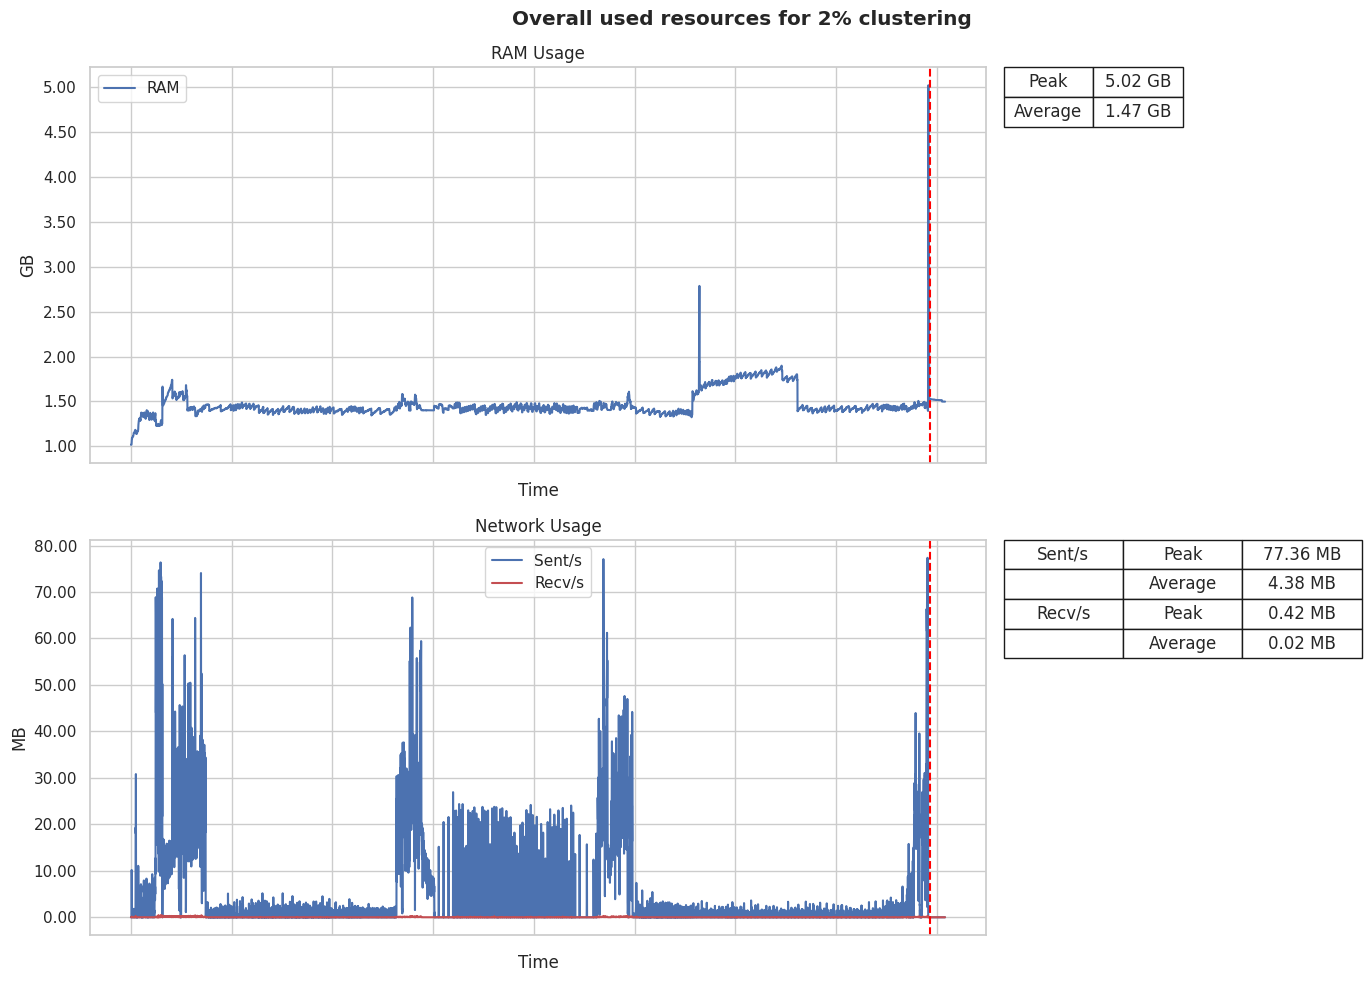

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to convert numbers to GB format
def to_gigabytes(x, _):
    return f"{(x / 1e9):.2f}"

# Function to convert numbers to MB format
def to_megabytes(x, _):
    return f"{(x / 1e6):.2f}"

# Load CSV file
data = pd.read_csv("2procento_NEW.csv", usecols=[
    #"timestamp",
    "used",
    "br-d9dc76c093c8.bytes_recv_rate_per_sec",
    "br-d9dc76c093c8.bytes_sent_rate_per_sec",
    "user"
])
#data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.strftime("%H:%M:%S")
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create plots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Overall used resources for 2% clustering", fontweight="bold")

# Plot for RAM
sns.lineplot(data=data["used"], color="b", label="RAM", ax=axes[0])

axes[0].set_title("RAM Usage")
axes[0].set_xlabel("Time")
axes[0].set_xticklabels("")
axes[0].set_ylabel("GB")
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(to_gigabytes))
#axes[0].xaxis.set_visible(False)
axes[0].axvline(x=7930, color="red", linestyle="--")
axes[0].grid(True)

# Add table
peak, avg = data["used"].max(), data["used"].mean()
table = [
    ["Peak", f"{to_gigabytes(peak, _)} GB"],
    ["Average", f"{to_gigabytes(avg, _)} GB"]
]
axes[0].table(cellText=table, cellLoc="center", bbox=[1.02, 0.85, 0.2, 0.15])

# Plot for Network
sentdata = data["br-d9dc76c093c8.bytes_sent_rate_per_sec"]
recvdata = data["br-d9dc76c093c8.bytes_recv_rate_per_sec"]

sns.lineplot(data=sentdata, color="b", label="Sent/s", ax=axes[1])
sns.lineplot(data=recvdata, color="r", label="Recv/s", ax=axes[1])

axes[1].set_title("Network Usage")
axes[1].set_xlabel("Time")
axes[1].set_xticklabels("")
axes[1].set_ylabel("MB")
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(to_megabytes))
#axes[1].xaxis.set_visible(False)
axes[1].axvline(x=7930, color="red", linestyle="--")
axes[1].grid(True)

# Add table
peak_sent, avg_sent = sentdata.max(), sentdata.mean()
peak_recv, avg_recv = recvdata.max(), recvdata.mean()
table = [
    ["Sent/s", "Peak", f"{to_megabytes(peak_sent, _)} MB"],
    ["", "Average", f"{to_megabytes(avg_sent, _)} MB"],
    ["Recv/s", "Peak", f"{to_megabytes(peak_recv, _)} MB"],
    ["", "Average", f"{to_megabytes(avg_recv, _)} MB"]
]
axes[1].table(cellText=table, cellLoc="center", bbox=[1.02, 0.7, 0.4, 0.3])

plt.legend()
plt.tight_layout()
plt.show()
